In [1]:
# import the modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# read the dataset and extract the features and target separately

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')

In [3]:
train.drop('Id', axis = 1, inplace = True)
train.head()

,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


In [4]:
train.shape, test.shape

((14384, 9), (3597, 9))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14384 entries, 0 to 14383
Data columns (total 9 columns):
Name           14384 non-null object
Age            14384 non-null int64
Nationality    14384 non-null object
Overall        14384 non-null int64
Potential      14384 non-null int64
Club           14173 non-null object
Value (M)      14384 non-null float64
Wage (M)       14384 non-null float64
Position       14384 non-null object
dtypes: float64(2), int64(3), object(4)
memory usage: 1011.5+ KB


### Check Numerical and Categorical columns

In [6]:
def numeric_features (dataframe):
    num_column = dataframe.select_dtypes(include = np.number).columns.tolist()
    return num_column
num_col = numeric_features(train)

def categorical_features(dataframe):
    cat_column = dataframe.select_dtypes(exclude = np.number).columns.tolist()
    return cat_column
cat_col = categorical_features(train)

num_col, cat_col

(['Age', 'Overall', 'Potential', 'Value (M)', 'Wage (M)'],
 ['Name', 'Nationality', 'Club', 'Position'])

In [7]:
train[num_col].describe()

,Age,Overall,Potential,Value (M),Wage (M)
count,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000
mean,25.148776,66.237695,71.181869,2.344967,0.011435
std,4.620911,6.954458,6.074111,5.105376,0.022614
min,16.000000,46.000000,46.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,0.300000,0.002000
50%,25.000000,66.000000,71.000000,0.675000,0.004000
75%,28.000000,71.000000,75.000000,2.100000,0.012000
max,47.000000,94.000000,94.000000,105.000000,0.565000


In [8]:
corr_num = train[num_col].corr()
print(corr_num)

                Age   Overall  Potential  Value (M)  Wage (M)
Age        1.000000  0.459678  -0.224055   0.082716  0.149757
Overall    0.459678  1.000000   0.678228   0.635618  0.589736
Potential -0.224055  0.678228   1.000000   0.595095  0.512910
Value (M)  0.082716  0.635618   0.595095   1.000000  0.845124
Wage (M)   0.149757  0.589736   0.512910   0.845124  1.000000


No highly correlated observations

### Check Missing Values

In [9]:
train.isnull().sum()

Name             0
Age              0
Nationality      0
Overall          0
Potential        0
Club           211
Value (M)        0
Wage (M)         0
Position         0
dtype: int64

In [10]:
train[train['Club'].isnull()]

,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
7,C. Bassogog,21,Cameroon,65,72,NaN,0.0,0.0,ST
65,H. Kekana,32,South Africa,73,73,NaN,0.0,0.0,CDM
102,Gervinho,30,Ivory Coast,79,79,NaN,0.0,0.0,RW
108,T. Hořava,29,Czech Republic,73,73,NaN,0.0,0.0,CAM
139,Wang Yongpo,30,China PR,68,68,NaN,0.0,0.0,CAM
...,...,...,...,...,...,...,...,...,...
14270,L. Azcona,33,Ecuador,68,68,NaN,0.0,0.0,GK
14311,R. Feltscher,26,Venezuela,68,71,NaN,0.0,0.0,LB
14359,T. Hamed,28,Egypt,66,67,NaN,0.0,0.0,CDM
14372,A. Aleksandrov,31,Bulgaria,68,68,NaN,0.0,0.0,CB


In [11]:
train[train['Wage (M)'] == 0].equals(train[train['Club'].isnull()])

True

where ever Club data is null, Wage data is '0' 

In [12]:
train[train['Nationality'] == 'Ivory Coast'].head(10)

,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
102,Gervinho,30,Ivory Coast,79,79,NaN,0.000,0.000,RW
140,S. Koné,21,Ivory Coast,54,65,Djurgårdens IF,0.100,0.001,CB
337,E. Latte Lath,18,Ivory Coast,63,83,Pescara,0.750,0.001,RW
1282,J. Boga,20,Ivory Coast,71,81,Birmingham City,3.800,0.048,LM
1335,K. Zohi,20,Ivory Coast,61,71,RC Strasbourg,0.425,0.004,ST
1538,R. Assalé,23,Ivory Coast,70,79,BSC Young Boys,2.800,0.015,LM
1832,C. Timite,19,Ivory Coast,54,72,AC Ajaccio,0.150,0.001,RW
2280,S. Doumbia,29,Ivory Coast,79,79,Sporting CP,12.500,0.026,CF
2501,L. Koné,28,Ivory Coast,76,77,Sunderland,7.000,0.013,CB
3031,A. Traorè,17,Ivory Coast,54,71,Perugia,0.130,0.001,RW


In [13]:
def missing_data(dataframe):
    total = dataframe.isnull().sum().sort_values(ascending = False)
    percentage = (dataframe.isnull().sum()/dataframe.count()).sort_values(ascending = False)
    missing_data = pd.concat([total, percentage], axis = 1, keys = ['Total', 'Percentage'])
    return missing_data

missing_data = missing_data(train)

### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

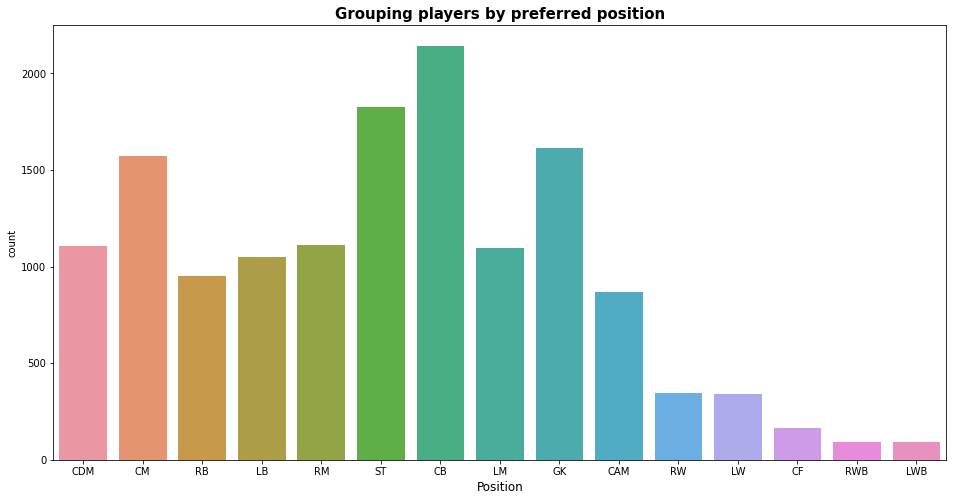

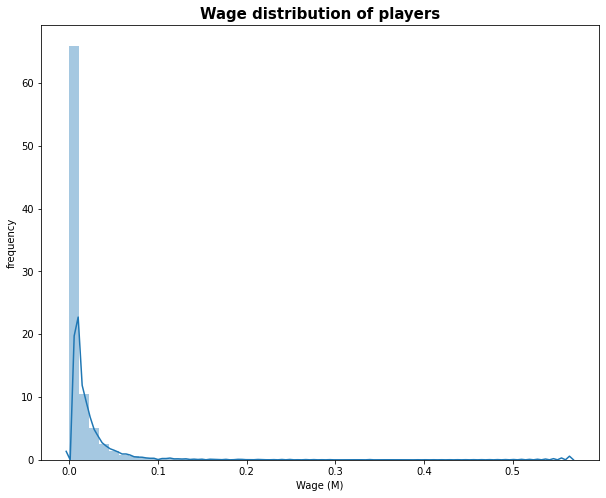

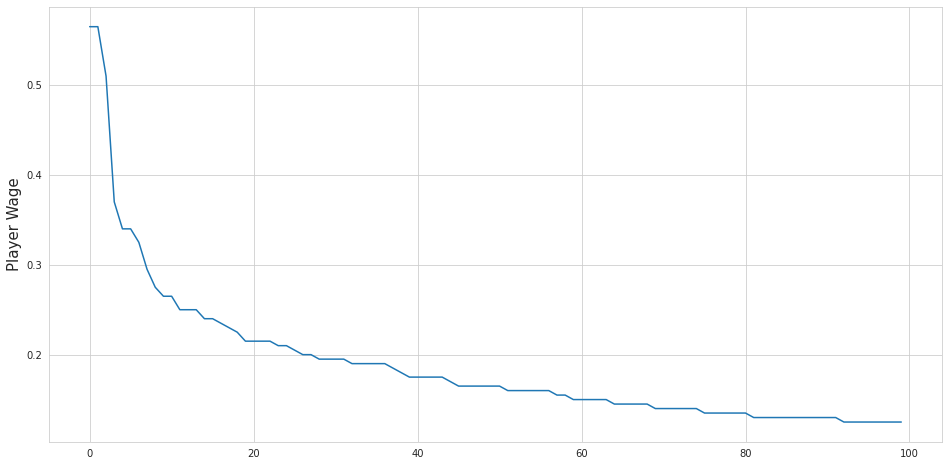

<Figure size 432x288 with 0 Axes>

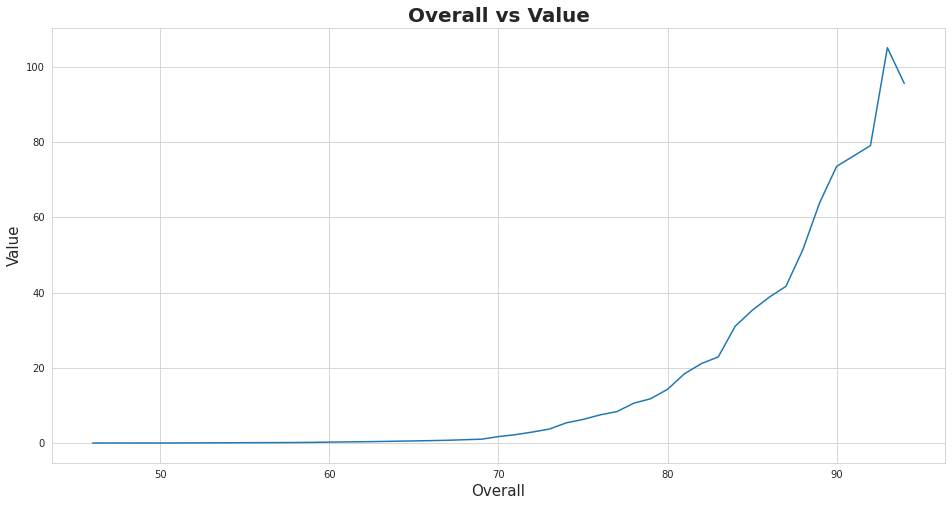

In [14]:
plt.figure(figsize = (16,8))
plt.title('Grouping players by preferred position', fontsize = 15, fontweight = 'bold')
plt.xlabel('Position', fontsize = 12)
plt.ylabel('count')
sns.countplot(x = 'Position', data = train)
plt.show()

plt.figure(figsize = (10,8))
plt.title('Wage distribution of players', fontsize = 15,fontweight = 'bold' )
plt.xlabel('Wage')
plt.ylabel('frequency')
sns.distplot(train['Wage (M)'])

value_dist = train.sort_values('Wage (M)', ascending = False).reset_index().head(100)[['Name', 'Wage (M)']]
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.ylabel('Player Wage', fontsize = 15)
plt.plot(value_dist['Wage (M)'])

plt.figure()
overall = train.sort_values('Overall')['Overall'].unique()
over_all_value = train.groupby('Overall')['Value (M)'].mean()
plt.figure(figsize = (16,8))
plt.title('Overall vs Value', fontsize=20, fontweight='bold')
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.plot(overall, over_all_value, label = 'Value in (M)')


    

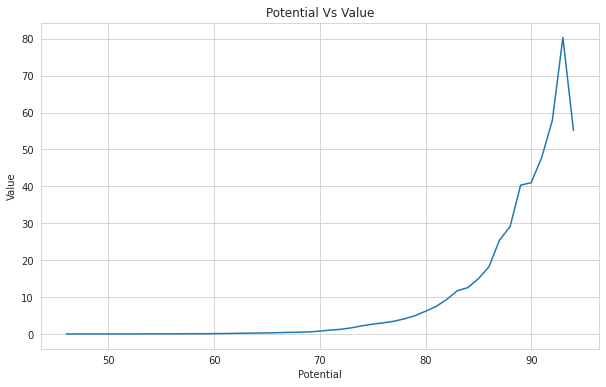

In [15]:
# Code Starts here
Potential = train.sort_values('Potential')['Potential'].unique()
potential_values = train.groupby('Potential')['Value (M)'].mean()
plt.figure(figsize= (10,6))
plt.plot(Potential, potential_values)
plt.xlabel('Potential')
plt.ylabel("Value")
plt.title('Potential Vs Value')
plt.show()
# Code ends here

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [16]:
# Code Starts here

X = train.drop('Value (M)', axis = 1)
y = train['Value (M)']

# independent variables
X = X[['Overall','Potential','Wage (M)', 'Age']]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 40, test_size = 0.3)

model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
print(mse, r2, mae)




# Code ends here

6.371747695098798 0.7545636056065502 1.3755094154249456


In [17]:
X_train.head()

,Overall,Potential,Wage (M),Age
6149,74,74,0.034,32
4061,69,75,0.011,24
5520,67,68,0.006,27
307,70,70,0.006,29
13365,64,78,0.005,20


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [18]:
# Code Starts here
Id = test['Id']

Y_pred = model.predict(test[['Overall', 'Potential', 'Wage (M)', 'Age']])
submission_sample = pd.DataFrame({'Id' : Id, 'Value (M)' : Y_pred})
submission_sample.to_csv('sample_submission.csv', index = False) 

# Code ends here

In [19]:
## Instantiate third degree polynomial features
poly = PolynomialFeatures(degree=2)


    
# fit and transform polynomial features on X_train    
X_train_2 = poly.fit_transform(X_train)

# instantiate Linear regression model
model=LinearRegression()

# fit the model 
model.fit(X_train_2,Y_train)
    
# transform on x_test    
X_test_2 = poly.transform(X_test)

# predict the model performance
y_pred_2=model.predict(X_test_2)
    
# Calculate the mean absolute error    
mae= mean_absolute_error(Y_test, y_pred_2)
print (mae)

# calculate the r2 score
r2= r2_score(Y_test, y_pred_2)
print(r2)

0.6461370089191879
0.9456115624875339


In [20]:
Id = test['Id']
test_obsev = test[['Overall', 'Potential', 'Wage (M)', 'Age']]
test_data = poly.fit_transform(test_obsev)
Y_pred = model.predict(test_data)

submission_sample = pd.DataFrame({'Id' : Id, 'Value (M)' : Y_pred})
submission_sample.to_csv('sample_submission.csv', index = False) 


In [21]:
train['Club']= train['Club'].str.replace('unknown', train.Club.mode()[0])

In [22]:
le = LabelEncoder()
train['Position'] = le.fit_transform(train['Position'])
train['Nationality'] = le.fit_transform(train['Nationality'])


In [26]:
poly = PolynomialFeatures(degree=2)
X = train.drop('Value (M)', axis = 1)
y = train['Value (M)']

# independent variables
X = X[['Overall','Potential','Wage (M)', 'Age', 'Position', 'Nationality']]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 40, test_size = 0.3)
X_train_2 = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_train_2, Y_train)
X_test_2 = poly.transform(X_test)
y_pred = model.predict(X_test_2)

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
print(mse, r2, mae)

Id = test['Id']
test['Position'] = le.fit_transform(test['Position'])
test['Nationality'] = le.fit_transform(test['Nationality'])

Y_pred = model.predict(poly.transform(test[['Overall', 'Potential', 'Wage (M)', 'Age', 'Position', 'Nationality']]))
submission_sample = pd.DataFrame({'Id' : Id, 'Value (M)' : Y_pred})
submission_sample.to_csv('sample_submission.csv', index = False) 



1.3723243671657253 0.9471387818958192 0.6402837998927461


In [ ]:
## Instantiate third degree polynomial features
poly = PolynomialFeatures(degree=2)


    
# fit and transform polynomial features on X_train    
X_train_2 = poly.fit_transform(X_train)

# instantiate Linear regression model
model=LinearRegression()

# fit the model 
model.fit(X_train_2,Y_train)
    
# transform on x_test    
X_test_2 = poly.transform(X_test)

# predict the model performance
y_pred_2=model.predict(X_test_2)
    
# Calculate the mean absolute error    
mae= mean_absolute_error(Y_test, y_pred_2)
print (mae)

# calculate the r2 score
r2= r2_score(Y_test, y_pred_2)
print(r2)